# Домашнее задание 1 - Классификация
<br>

Задание выполнил(а): *Пославский Александр*
<br>
**Дедлайн:** 23.04.2021 23:59


### О задании
В этом домашнем задании вы научитесь работать с CAS при помощи библиотеки swat, познакомитесь c библиотекой dlpy, позволяющей использовать функциональность SAS для глубинного обучения из Python, а так же построите с помощью этих библиотек модель для классификации изображений одежды.
<br>
Для выполнения заданий нужно самостоятельно написать или дополнить написанный код, а так же письменно ответить на вопросы (в зависимости от задания).

**Домашнее задание построено следующим образом:**
- Подключение к серверу CAS
- Задание 1: Загрузка данных в CAS (1 балл)
- Задание 2: Посмотрим на данные (1 балл)
- Задание 3: Выделение валидационной выборки из train (1 балл)
- Задание 4: Построение нейронной сети (3 балла)
- Задание 5: Обучение сети (2 балла)
- Задание 6: Оценка качества полученной модели (2 балла)
- Дополнительное задание: Aугментации исходных данных (+2 балла)<br>

Итого, полностью выполнив задание вы получите 10 баллов. Вы также можете выполнить дополнительное задание, чтобы получить еще 2 бонусных балла.

### Формат сдачи

После того, как вы выполните домашную работу, поместите jupyter notebook с выполнеными заданиями, а так же все SAS-таблицы с сохраненными моделями в закрытый git-репозиторий на GitHub. Предоставьте доступ к репозиторию аккаунтам GazizovMarat и Ala1s (добавив в свой реппозиторий в качестве коллабораторов).

### Важно 
Для того, чтобы ваши результаты были воспроизводимыми для проверки, указывайте seed при вызове методов, где это возможно. Напоминания об этом так же содержатся в тексте заданий.

In [1]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from swat import *
from dlpy import Model, Sequential
from dlpy import metrics
from dlpy.layers import *
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split

## Подключение к серверу CAS

Подключитесь к серверу CAS под своим логином и паролем.<br>Загрузите следующие Action Sets: 'image','deepLearn'.<br>
<br>
Для выполнения задания обратитесь к документации по следующим ссылкам: <br>
- https://sassoftware.github.io/python-swat/getting-started.html <br>

In [2]:
# os.environ['CAS_CLIENT_SSL_CA_LIST'] = r"/tmp/4fix/trustedcerts.pem"

# Создаем новую сессию CAS:

s = CAS('tiger.cs.msu.ru', 5570, username='msu59', password='HumbolDt%~')

# Загружаем action sets:

s.loadactionset('image')
s.loadactionset('deepLearn')
s.loadactionset('datastep')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.
NOTE: Added action set 'datastep'.


[actionset]

 'datastep'

+ Elapsed: 0.000453s, user: 0.000236s, sys: 0.000166s, mem: 0.203mb

#### Загрузка данных
Для работы с изображениями в SAS DLPy используются специализированные таблицы - ImageTable. Для загрузки набора данных, помимо сессии CAS и названия для новой таблицы, требуется указать путь к папке с набором данных сервере. 
При загрузке нужно указать путь к папке, устроенной следующим образом: <br>
* shirt
    - shirt_image0.png
    - shirt_image1.png
    - ...
* pants
    - pants_image0.png
    - pants_image1.png
    - ...
* ... 
<br>
То есть, папка должна состоять из подпапок, называющихся соответственно классам обьектов на изображении. В каждой из таких подпапок должны лежать все изобращения с обьектами соответствующего класса.<br>
Папки train-images (обучающая выборка) и t10k-images (тестовая выборка) внутри папки data в этом репозитории устроены описанным выше образом. 
Также, данные fashion-MNIST можно скачать из следующего репозитория:<br> 
- https://github.com/zalandoresearch/fashion-mnist <br>

**Задание 1: Загрузка данных в CAS**<br>
Загрузите обучающие и тестовые данные в CAS, создав ImageTable (для каждой выборки отдельно).

In [3]:
home = '/var/home/msu59/sasuser.viya/SAS-CV-2020-Homework1/'

In [4]:
# создайте ImageTable для обучающей выборки #

In [5]:
train_data = ImageTable.load_files(s, path=f'{home}data/train-images')

In [6]:
# создайте ImageTable для тестовой выборки #

In [7]:
test_data = ImageTable.load_files(s, path=f'{home}data/t10k-images')

**Задание 2: Исследование данных**<br>
а) С помощью метода show выведите 16 случайных изображений из ImageTable в таблице размером 4x4 ячейки (для train и test отдельно).

In [8]:
# выведите 16 изображений из обучающей выборки #

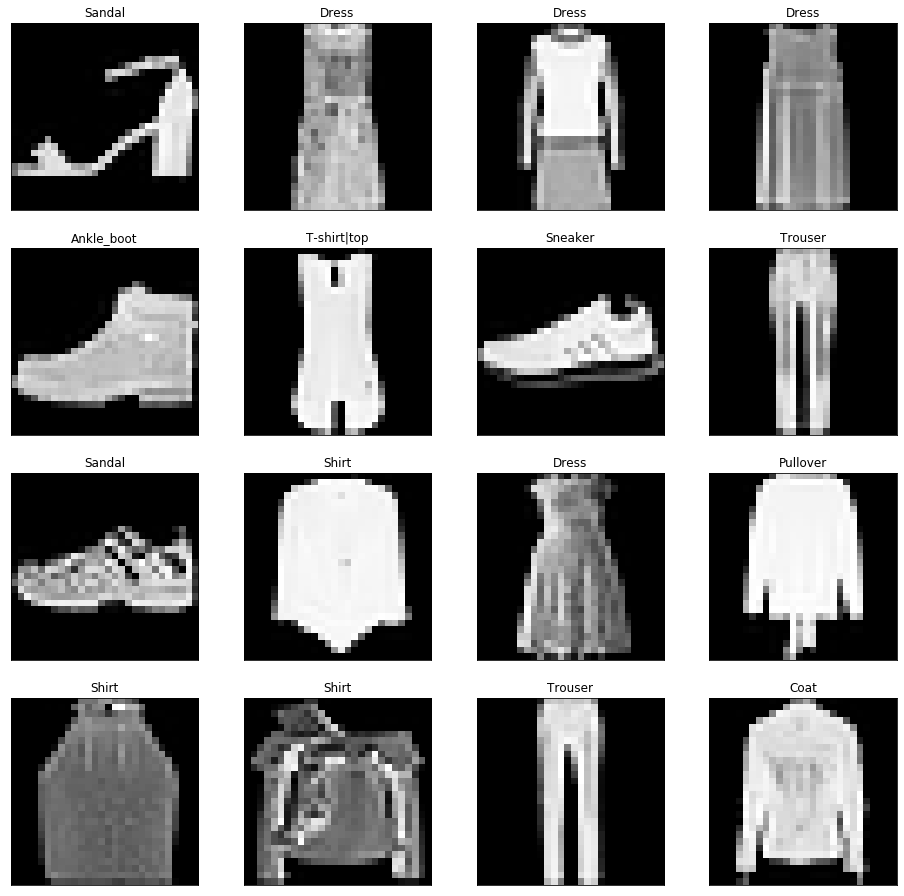

In [9]:
train_data.show(nimages=16, ncol=4, randomize=True)

In [10]:
# выведите 16 изображений из тестовой выборки #

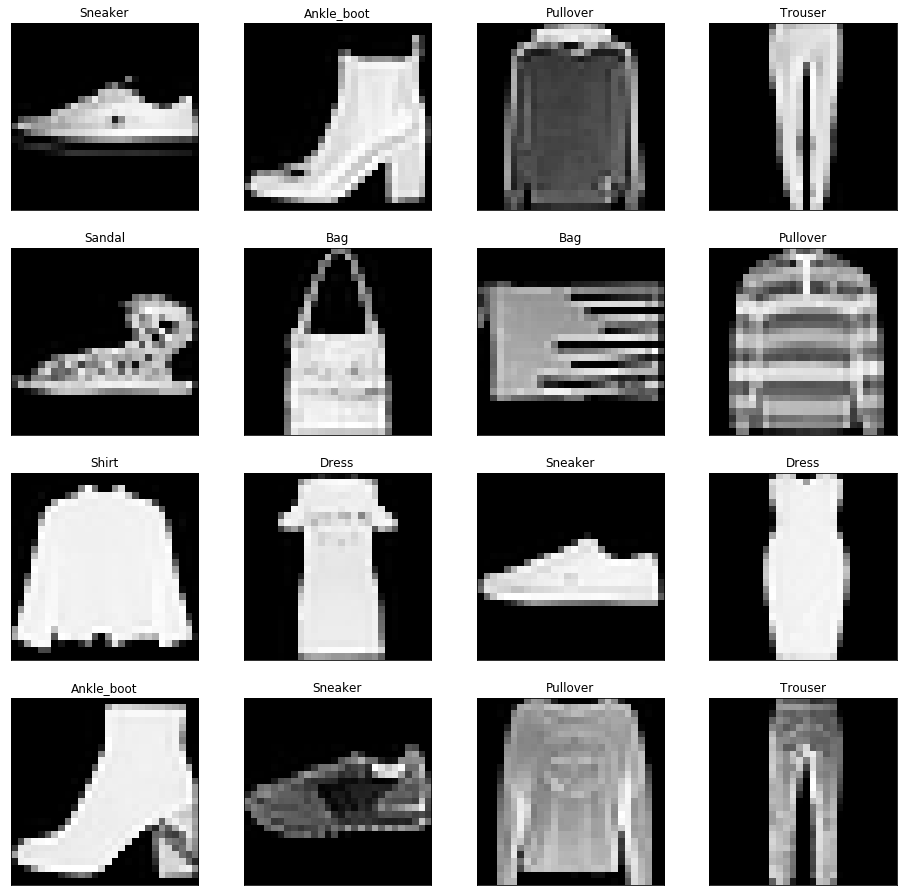

In [11]:
test_data.show(nimages=16, ncol=4, randomize=True)

b) Найдите метод класса ImageTable, позволяющий подсчитать статистику по метаданным таблицы (например, средние размеры или значения пикселей). Примените этот метод к таблицам, в которые вы загрузили наборы данных train и test.

In [12]:
# статистики по метаданным для train #

In [13]:
train_data.image_summary

jpg                 60000
minWidth               28
maxWidth               28
minHeight              28
maxHeight              28
meanWidth              28
meanHeight             28
mean1stChannel    72.9404
min1stChannel           0
max1stChannel         255
mean2ndChannel          0
min2ndChannel           0
max2ndChannel           0
mean3rdChannel          0
min3rdChannel           0
max3rdChannel           0
dtype: object

In [14]:
# статистики по метаданным для test #

In [15]:
test_data.image_summary

jpg                 10000
minWidth               28
maxWidth               28
minHeight              28
maxHeight              28
meanWidth              28
meanHeight             28
mean1stChannel    73.1466
min1stChannel           0
max1stChannel         255
mean2ndChannel          0
min2ndChannel           0
max2ndChannel           0
mean3rdChannel          0
min3rdChannel           0
max3rdChannel           0
dtype: object

**Задание 3: Выделение валидационной выборки из train**<br>
- Перед тем, как выделить из train выборку для валидации модели, посмотрите на распределение классов (с помощью свойства ImageTable).
- Выделите из таблицы train выборку в размере 15 процентов от исходного с помощью two_way_split. Убедитесь, что вы задали seed, для того, чтобы мы могли воспроизвести и проверить ваши результаты), а возвращаемые таблицы - типа ImageTable, как и исходная.
- После выделения validate выборки, снова посмотрите на распреление классов на train и validate выборках, чтобы убедиться, что в обеих выборках присутстует равное количество примеров для каждого из классов.

In [16]:
train_data.label_freq

,Level,Frequency
Ankle_boot,1,6000
Bag,2,6000
Coat,3,6000
Dress,4,6000
Pullover,5,6000
Sandal,6,6000
Shirt,7,6000
Sneaker,8,6000
T-shirt|top,9,6000
Trouser,10,6000


In [17]:
# код для деления на 2 выборки
train_data, val_data = two_way_split(train_data, test_rate=15, seed=42)

In [18]:
train_data.label_freq

,Level,Frequency
Ankle_boot,1,5100
Bag,2,5100
Coat,3,5100
Dress,4,5100
Pullover,5,5100
Sandal,6,5100
Shirt,7,5100
Sneaker,8,5100
T-shirt|top,9,5100
Trouser,10,5100


In [19]:
val_data.label_freq

,Level,Frequency
Ankle_boot,1,900
Bag,2,900
Coat,3,900
Dress,4,900
Pullover,5,900
Sandal,6,900
Shirt,7,900
Sneaker,8,900
T-shirt|top,9,900
Trouser,10,900


**Задание 4: Построение модели**<br>
Постройте модель, соответствующую изображенной на картинке, c помощью dlpy в Sequential-подходе.
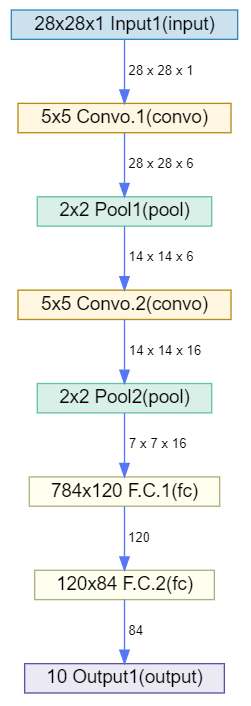

In [20]:
# код для построения модели #
model = Sequential(conn=s, model_table="Simple_CNN")
model.add(InputLayer(n_channels=1, width=28, height=28))
model.add(Conv2d(n_filters=6, width=5, height=5, stride=1))
model.add(Pooling(width=2, height=2, stride=2, pool='max'))
model.add(Conv2d(n_filters=16, width=5, height=5, stride=1))
model.add(Pooling(width=2, height=2, stride=2, pool='max'))
model.add(Dense(n=120))
model.add(Dense(n=84))
model.add(OutputLayer(n=10))


NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


**Задание 5: Oбучение модели**<br>
а) Обучите построенную модель. Гиперпараметры для обучения уже заданы, менять их не требуется. Не забудьте задать seed, чтобы  ваши результаты были воспроизводимыми. Полученная вами модель должна показать Miscalssification Rate < 15% на тестовой выборке.

In [21]:
from dlpy.model import *
from dlpy.model import Optimizer
from dlpy.lr_scheduler import *

In [22]:
# Variable for Number of Epochs
nEpoch=50

# Variable for Number of Threads
nThread=4

# Variable for Batch Size
batchSize=128

# Calculate miniBatch Size
miniBatch=math.ceil(batchSize/nThread)

# Define Learning Rate scheduler parameters
lr_scheduler=ReduceLROnPlateau(conn=s, 
                               cool_down_iters=3, 
                               gamma=0.8, 
                               learning_rate=0.001, 
                               patience=5
                               )

# Define Momentum Solver parameters
solver=MomentumSolver(lr_scheduler=lr_scheduler,
                      clip_grad_max = 100, 
                      clip_grad_min = -100
                      )                       

# Define Solver optimizer parameter settings
optimizer=Optimizer(seed=12345, 
                    algorithm=solver, 
                    mini_batch_size = miniBatch, 
                    log_level=2, 
                    max_epochs=nEpoch, 
                    reg_l2=0.0005
                    )


The following argument(s) learning_rate, gamma, step_size, power are overwritten by the according arguments specified in lr_scheduler.


In [23]:
# код для обучения модели
train_history = model.fit(train_data, valid_table=val_data, mini_batch_size=miniBatch, max_epochs=nEpoch, 
                          n_threads=nThread, lr=lr_scheduler, optimizer=optimizer, seed=42)

NOTE: Inputs=_image_ is used
NOTE: Training from scratch.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 107786.
NOTE:  The approximate memory cost is 16.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       0.07 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 32.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 128.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:     10
NOTE:  Levels for the target variable:
NOTE:  Level      0: Ankle_boot 
NOTE:  Level      1: Bag        
NOTE:  Level      2: Coat       
NOTE:  Level      3: Dress      
NOTE:  Level      4: Pullover   
NOTE:  Level      5: Sandal     
NOTE:  Level      6: Shirt      
NOTE:  Level      7: Sneaker    
NOTE:  Level      8: T-shirt|top
NOTE:  Level      9: Trouser    
NOTE:  Number of input variables:     1
NOTE:  

b) Пользуясь значениями в history, постройте график, анологичный изображенному.
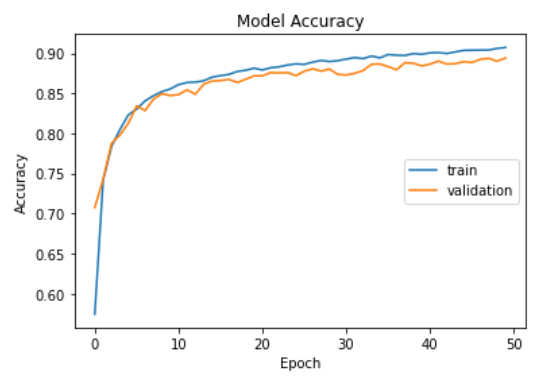

In [24]:
#код для построения графика#

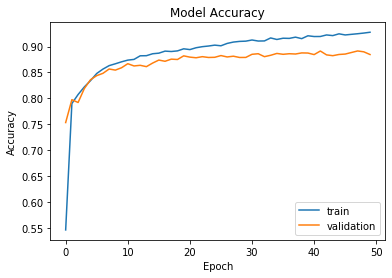

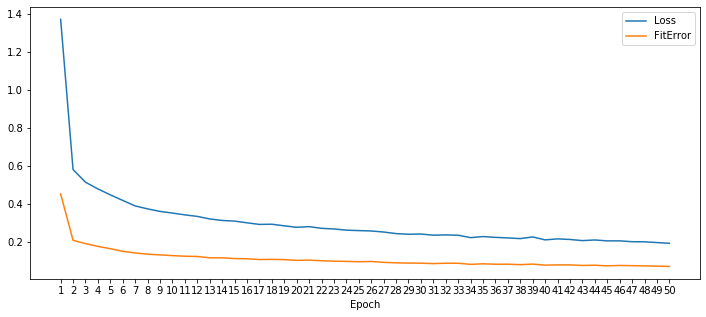

In [25]:
history = train_history["OptIterHistory"]
plt.plot(range(len(history)), 1 - history['FitError'], label='train')
plt.plot(range(len(history)), 1 - history['ValidError'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

model.plot_training_history()

**Задание 6: Oценка качества модели**<br>

а) Выведите матрицу ошибок на валидационной выборке для модели и ответьте на следующие вопросы:
- Сколько изображений сумок было корректно классифицированно моделью?
- Сколько пулловеров было классифицированно моделью как рубашки? Наоборот?
- В классификации какого предмета одежды модель ошибалась чаще всего? А реже всего?

In [26]:
# код для вывода матрицы ошибок#

In [27]:
model.evaluate(val_data)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          9000
 1  Number of Observations Used          9000
 2  Misclassification Error (%)      11.54444
 3                   Loss Error      0.344232

[OutputCasTables]

            casLib              Name  Rows  Columns  \
 0  CASUSER(msu59)  Valid_Res_BpzTtF  9000       17   
 
                                             casTable  
 0  CASTable('Valid_Res_BpzTtF', caslib='CASUSER(m...  

+ Elapsed: 0.182s, user: 3.11s, sys: 0.19s, mem: 117mb

In [28]:
model.valid_conf_mat

,_label_,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,Ankle_boot,871.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,0.0,0.0
1,Bag,0.0,869.0,4.0,5.0,4.0,3.0,7.0,2.0,6.0,0.0
2,Coat,0.0,6.0,706.0,47.0,71.0,0.0,67.0,0.0,2.0,1.0
3,Dress,0.0,2.0,24.0,824.0,3.0,0.0,28.0,0.0,13.0,6.0
4,Pullover,0.0,3.0,89.0,5.0,707.0,0.0,90.0,0.0,6.0,0.0
5,Sandal,7.0,1.0,0.0,0.0,0.0,880.0,0.0,11.0,1.0,0.0
6,Shirt,0.0,12.0,31.0,34.0,55.0,0.0,665.0,0.0,101.0,2.0
7,Sneaker,38.0,1.0,0.0,0.0,0.0,27.0,0.0,834.0,0.0,0.0
8,T-shirt|top,0.0,6.0,1.0,23.0,14.0,0.0,125.0,0.0,728.0,3.0
9,Trouser,0.0,1.0,0.0,17.0,1.0,0.0,1.0,0.0,3.0,877.0


Ваши ответы на вопросы:
1) 869 изображений сумок было корректно классифицированно моделью
2) 90 пулловеров было классифицированно моделью как рубашки. Наоборот 55
3) чаще всего ошиблась в рубашке (665 верных), реже всего в сандалях (880 верных)

b) Проскорьте модель на тестовой выборке.

In [29]:
# код для скоринга #
model.evaluate(test_data)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read         10000
 1  Number of Observations Used         10000
 2  Misclassification Error (%)         12.52
 3                   Loss Error       0.36655

[OutputCasTables]

            casLib              Name   Rows  Columns  \
 0  CASUSER(msu59)  Valid_Res_BpzTtF  10000       17   
 
                                             casTable  
 0  CASTable('Valid_Res_BpzTtF', caslib='CASUSER(m...  

+ Elapsed: 0.197s, user: 3.44s, sys: 0.34s, mem: 117mb

c) Выведите пример изображения, классифицированного верно, с помощью встроенной функции класса Model.

NOTE: Table TEMP_PLOT contains compressed images.
NOTE: Cloud Analytic Services dropped table TEMP_PLOT from caslib CASUSER(msu59).


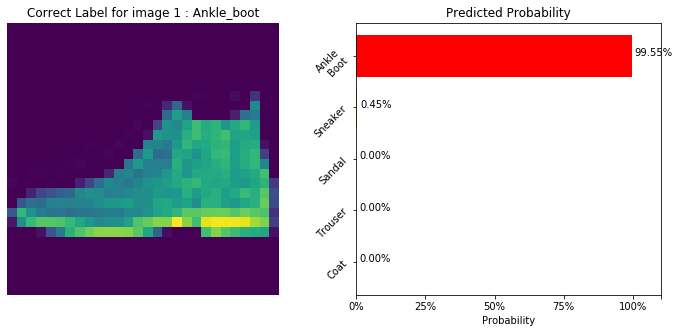

In [30]:
# код для вывода верно классифицированного изображения#
model.plot_evaluate_res(img_type='C', n_images=1)

d) Выведите пример изображения, классифицированного ошибочно, с помощью встроенной функции класса Model.

NOTE: Table TEMP_PLOT contains compressed images.
NOTE: Cloud Analytic Services dropped table TEMP_PLOT from caslib CASUSER(msu59).


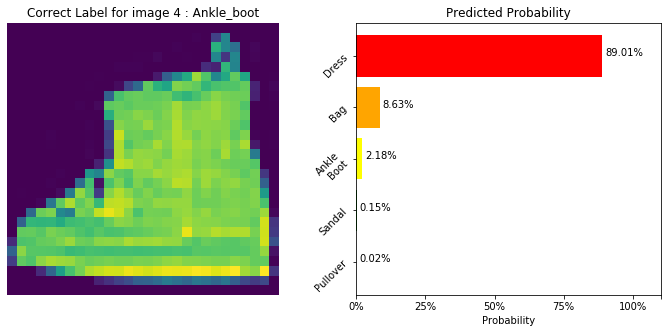

In [31]:
# код для вывода неверно классифицированного изображения#
model.plot_evaluate_res(img_type='M', n_images=1)

e) Сохраните полученную модель в SAS-таблицу, с помощью одного из методов класса Model.

In [32]:
# код для сохранения модели #
save_path = f'{os.getcwd()}/first_model/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)
model.deploy(path=save_path, output_format='table')

NOTE: Model table saved successfully.


**Дополнительное задание: Aугментации исходных данных**<br>
Изучите документацию к CAS-action augmentImages. Попробуйте улучшить результат предыдущей модели, применив аугментации к исходным данным и, по желанию, другие техники для улучшения качества модели. Полученную модель проскорьте на тестовой выборке и сохраните в SAS-таблицу. Выведите метрики качества новой модели на тестовой выборке.

In [33]:
# аугментация у меня давала плохой результат и разобраться в документации с этим оказалось проблематично. 
# поэтому я просто сделал другую архитекртуру нейронной сети

# train_data.as_patches(width=24, height=24, step_size=2, output_width=28, output_height=28)
# augmented = s.augmentImages(table=train_data, casout=dict(name='augmented'),
#                 cropList=[dict(sweepImage=True, x=0, y=0,
#                                        width=25, height=25,
#                                        outputwidth=28,
#                                        outputheight=28,
#                                        mask=True)])

In [34]:
train_data.image_summary

jpg                 51000
minWidth               28
maxWidth               28
minHeight              28
maxHeight              28
meanWidth              28
meanHeight             28
mean1stChannel    72.9433
min1stChannel           0
max1stChannel         255
mean2ndChannel          0
min2ndChannel           0
max2ndChannel           0
mean3rdChannel          0
min3rdChannel           0
max3rdChannel           0
dtype: object

In [35]:
model2 = Sequential(conn=s, model_table="almost_simple_CNN")
model2.add(InputLayer(n_channels=1, width=28, height=28))
model2.add(Conv2d(n_filters=6, width=5, height=5, stride=2, act=None))
model2.add(BN(act='relu'))
model2.add(Conv2d(n_filters=16, width=5, height=5, stride=2, act=None))
model2.add(BN(act='relu'))
model2.add(Pooling(width=2, height=2, stride=2, pool='max'))
model2.add(Dense(n=120, dropout=0.2))
model2.add(Dense(n=84, dropout=0.2))
model2.add(OutputLayer(n=10))

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [36]:
train_history2 = model2.fit(train_data, valid_table=val_data, mini_batch_size=miniBatch, max_epochs=nEpoch, 
                            n_threads=nThread, lr=lr_scheduler, optimizer=optimizer, seed=42)

NOTE: Inputs=_image_ is used
NOTE: Training from scratch.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 44470.
NOTE:  The approximate memory cost is 7.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       0.07 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 32.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 128.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:     10
NOTE:  Levels for the target variable:
NOTE:  Level      0: Ankle_boot 
NOTE:  Level      1: Bag        
NOTE:  Level      2: Coat       
NOTE:  Level      3: Dress      
NOTE:  Level      4: Pullover   
NOTE:  Level      5: Sandal     
NOTE:  Level      6: Shirt      
NOTE:  Level      7: Sneaker    
NOTE:  Level      8: T-shirt|top
NOTE:  Level      9: Trouser    
NOTE:  Number of input variables:     1
NOTE:  Nu

Text(0.5, 1.0, 'Model Accuracy')

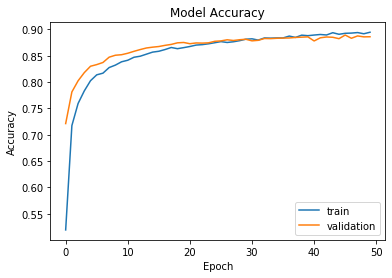

In [37]:
history = train_history2["OptIterHistory"]
plt.plot(range(len(history)), 1 - history['FitError'], label='train')
plt.plot(range(len(history)), 1 - history['ValidError'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')


In [38]:
model2.evaluate(test_data)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read         10000
 1  Number of Observations Used         10000
 2  Misclassification Error (%)         11.74
 3                   Loss Error      0.324254

[OutputCasTables]

            casLib              Name   Rows  Columns  \
 0  CASUSER(msu59)  Valid_Res_X25uCJ  10000       17   
 
                                             casTable  
 0  CASTable('Valid_Res_X25uCJ', caslib='CASUSER(m...  

+ Elapsed: 0.112s, user: 1.41s, sys: 0.254s, mem: 104mb

In [39]:
save_path = f'{os.getcwd()}/second_model/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)
model2.deploy(path=save_path, output_format='table')

NOTE: Model table saved successfully.
